# Harjoittele data-analyysiä

# Tämä on minun oma harjoitukseni:

In [1]:
import pandas as panda
import matplotlib.pyplot as plottaus

In [2]:
data = panda.read_csv("keskilampotila2020_Tampere.csv")

In [3]:
data.head()

,Vuosi,Kk,Keskilämpötila (degC)
0,2020,1,0.9
1,2020,2,-0.9
2,2020,3,0.7
3,2020,4,3.4
4,2020,5,8.5


In [11]:
Kk = data["Kk"]

In [9]:
lämpötila = data["Keskilämpötila (degC)"]

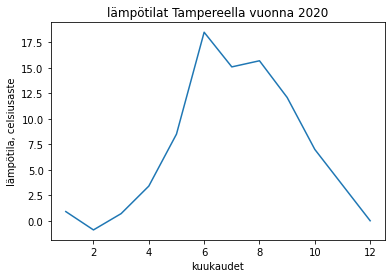

In [16]:
plottaus.plot(Kk, lämpötila)
plottaus.xlabel("kuukaudet")
plottaus.ylabel("lämpötila, celsiusaste")
plottaus.title("lämpötilat Tampereella vuonna 2020")
plottaus.show()

In [20]:
data2 = panda.read_csv('lampotila_tammikuu2021_Helsinki.csv')
data2.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Sademäärä (mm),Lumensyvyys (cm),Ilman lämpötila (degC),Tuulen nopeus (m/s)
0,2021,1,1,00:00,UTC,0.0,0.0,0.4,1.7
1,2021,1,1,00:10,UTC,NaN,0.0,0.4,1.5
2,2021,1,1,00:20,UTC,NaN,0.0,0.4,1.1
3,2021,1,1,00:30,UTC,NaN,0.0,0.4,0.9
4,2021,1,1,00:40,UTC,NaN,0.0,0.5,1.1


In [21]:
lämpötilat2 = data2['Ilman lämpötila (degC)']

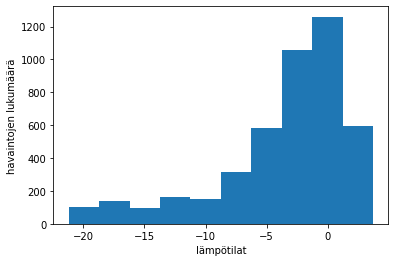

In [28]:
plottaus.hist(lämpötilat2, bins =10)
plottaus.xlabel("lämpötilat")
plottaus.ylabel("havaintojen lukumäärä")
plottaus.show()

Tässä harjoituksessa käydään läpi esimerkki siitä, miten ohjelmointia voidaan hyödyntää datan analysoimisessa Python-ohjelmointikielellä. Aloitamme Jupyter notebook -ympäristön perusteista ja etenemme siitä Pythonin ja data-analyysin pariin.

## Notebookien käyttö

Jupyter notebookit ovat dokumentteja, joihin voidaan kirjoittaa tekstiä, lisätä kuvia tai videoita sekä kirjoittaa koodia ja nähdä koodin tulos.

Dokumentti rakentuu "soluista", jotka voivat olla joko **tekstisoluja** tai **koodisoluja**. Esimerkiksi tämä solu on tekstisolu. Jos painat tätä tekstisolua, näet että solun reuna muuttuu siniseksi. Tämä tarkoittaa sitä, että solu on valittu. Jos taas kaksoisklikkaat tekstisolua, se avautuu muokkaustilaan ja solun reuna muuttuu vihreäksi. Solun voi "ajaa" painamalla "Run"-painiketta yläreunan työkaluista. Tekstisolun tapauksessa solun ajaminen tarkoittaa sitä, että muokkaustilassa oleva solu menee näyttötilaan.

Esimerkki koodisolusta on tämän solun alapuolella. Koodisolun tunnistaa siitä, että sen vasemmassa reunassa on teksti `In [ ]:`. Koodisoluun voidaan kirjoittaa ohjelmakoodia Python-kielellä. Kokeile ajaa alla oleva solu "Run"-painiketta painamalla ja katso, mitä tapahtuu!

In [ ]:
# Koodisoluissa "#"-merkillä alkavat rivit ovat kommentteja. Ne eivät vaikuta ajettavaan koodiin.
# Kommenteissa kerrotaan tyypillisesti, mitä koodi tekee. Siihen voi kirjoittaa myös vaikkapa ohjeita.

print('Hello, World!')

Hienoa, ajoit juuri ensimmäisen koodisolusi! Kun koodisolu on ajettu, solun reunassa olevien sulkeiden sisään tulee numero, esim. `In [1]:`. Jos sulkeiden sisällä on asteriski, eli `In [*]:`, solun ajaminen on vielä kesken.

Notebookeissa voit lisätä soluja aktiivisen solun alapuolelle painamalla työkaluista "+"-painiketta. Aktiivisen solun voi muuttaa koodisolusta tekstisoluksi ja päinvastoin työkalupalkin pudotusvalikosta. Koodisolu on "Code" ja tekstisolu on "Markdown". Kokeile lisätä koodisolu ja tulostaa jokin teksti vastaavaan tapaan kuin "Hello, World!" yläpuolella!

## Python-ohjelmointi

Tämän harjoituksen tarkoituksena on opastaa data-analyysin saloihin Pythonin avulla. Tästä syystä emme käy läpi kaikkia Python-kielen hienouksia, vaan tutustumme käytännönläheisesti Pythoniin data-analyysissa. Jos kaipaat enemmän materiaalia päästäksesi alkuun Pythonin kanssa, voit aloittaa esimerkiksi osoitteesta [https://www.learnpython.org/](https://www.learnpython.org/).

### Datan lukeminen tiedostosta

Olennainen osa data-analyysiä on hankkia itse data. Kun data on kerätty, se tallennetaan yleensä johonkin tiedostoon. Otetaan esimerkkinä vaikkapa Ilmatieteenlaitoksen säähavainnot. Säähavainnoista kertyy dataa, joka tallennetaan tiedostoihin. Ilmatieteenlaitoksen avoimesta hakupalvelusta voidaan hakea dataa tietyillä kriteereillä, jolloin voimme ladata haluamamme datan esimerkiksi csv-tiedostona. Käytetään esimerkkidatana [Ilmatieteenlaitoksen hakupalvelusta](https://www.ilmatieteenlaitos.fi/havaintojen-lataus) ladattua dataa vuoden 2020 kuukausien keskilämpötiloista Helsinki-Vantaan lentoasemalta mitattuna. Datatiedosto on valmiiksi ladattu hakupalvelusta ja löytyy tiedostonimellä "keskilampotila2020_Helsinki.csv".

Pythonissa on sekä valmiina että ladattavissa paljon erilaisia paketteja (myös kirjasto tai moduuli), jotka sisältävät muiden tekemää koodia, jota voi kätevästi hyödyntää omassa koodissaan. Tutustutaan tässä kahteen data-analyysin kannalta olennaiseen pakettiin, jotka ovat [pandas]() ja [matplotlib](). Pandas-paketti sisältää työkaluja datatiedostojen lukemiseen ja datan käsittelyyn koodissa. Matplotlib puolestaan tarjoaa työkaluja kuvaajien piirtämiseen.

Koodissa paketit voidaan ottaa käyttöön `import` komennolla, jonka jälkeen kirjoitetaan paketin nimi, esimerkiksi

```python
import pandas
```

Tämän jälkeen pandas-paketin työkalut, esimerkiksi [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) (jonka avulla voidaan lukea dataa tiedostosta) ovat käytettävissä seuraavasti:

```python
pandas.read_csv(...)
```

Tyypillisesti paketeille asetetaan lyhenne, jolloin koodissa ei tarvitse aina kirjoittaa paketin koko nimeä:

```python
import pandas as pd
pd.read_csv(...)
```

<div class="alert alert-info">
    
**Paketit**

Ota koko paketti käyttöön **import**-komennolla

```python
import moduulin_nimi as lyhenne
```

Esimerkiksi:
    
```python
import pandas as pd
```
</div>

In [ ]:
# Kirjoita tähän soluun koodi, joka ottaa käyttöön pandas kirjaston lyhenteellä "pd"
# Lopuksi aja solu. Huom! Solu ei tulosta mitään, koska lataamme ainoastaan paketin käyttöömme.



Datan lukeminen tiedostosta onnistuu [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)-työkalulla. Pythonissa tällaiset työkalut ovat nimeltään funktioita. Käytännössä funktiot ovat sellaista koodia, jota tarvitaan usein, ja jota voidaan uudelleenkäyttää helposti. Pythonissa on paljon [valmiita funktioita](https://docs.python.org/3/library/functions.html), esimerkiksi  [`print()`](https://docs.python.org/3/library/functions.html#print), jota käytit jo aiemmin. `print()`-funktiolle kirjoitetaan sulkeiden sisään tulostettava teksti, kuten "Hello, World!". Tätä kutsutaan funktion parametriksi. Funktiosta riippuen parametreja voidaan tarvita useampiakin (tai ei yhtäkään). Otetaan vielä esimerkki funktiosta [`pow(x, y)`](https://docs.python.org/3/library/functions.html#pow), joka korottaa annetun luvun x potenssiin y:

In [ ]:
# Lasketaan 3^2 (3 potenssiin 2). 
# Aja tämä solu

pow(3,2)

Funktio voi siis antaa jonkin **paluuarvon**, kuten äskeisessä esimerkissä luvun 9. Paluuarvo voidaan myös tallettaa **muuttujaan**, jolloin sitä voidaan käyttää myöhemmin koodissa.

In [ ]:
# Lasketaan 3^2 ja tallennetaan tulos muuttujaan "x"
# Aja tämä solu. Huom. solu ei tulosta mitään, koska arvo vain tallennetaan muuttujaan.

x = pow(3,2)

In [ ]:
# Tulostetaan muuttujan x arvo
# Huom. Muuttujan arvoa tulostettaessa ei käytetä lainausmerkkejä muuttujan nimen ympärillä.
# Voit kokeilla mitä tapahtuu, jos lisäät lainausmerkit x:n ympärille.
# Aja tämä solu

print(x)

Jotkin funktiot kuuluvat Pythoniin valmiina, mutta paketit (kuten pandas ja matplotlib) sisältävät ainakin meidän kannalta hyödyllisiä funktioita. Funktioita voi tehdä myös itse, mutta sitä ei käsitellä tässä ohjeessa.
    
Palataan datan lukemiseen. Dataa voidaan lukea pandas-paketin [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)-funktiolla, jolle annetaan parametrinä luettavan datatiedoston nimi, esimerkiksi

```python
pd.read_csv('tiedostonimi.csv')
```

[`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)-funktiolle voidaan antaa paljon muitakin parametreja, esimerkiksi `delimiter=";"`, mikäli datatiedostossa erottimena olisi pilkun sijaan puolipilkku. Koko listan funktion parametreista näet [täältä](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
Pelkästään datan lukemisesta ei kuitenkaan ole hyötyä, vaan data pitää myös tallentaa, jotta sitä voidaan käyttää koodissa. Data voidaan tallentaa muuttujaan samaan tapaan kuin aiemmassa esimerkissä tallensimme potenssilaskun tuloksen:

```python
data = pd.read_csv('tiedostonimi.csv')
```

Kun data on tallennettu "data"-nimiseen muuttujaan, voimme myöhemmin koodissa käsitellä dataa tähän muuttujaan viittaamalla. Huomaa, että muuttujan nimen ei tarvitse olla "data", vaan sen voi vapaasti keksiä itse.

<div class="alert alert-info">
    
**Funktiot**
    
Funktion käyttäminen ja paluuarvon tallentaminen muuttujaan
```python
x = funktion_nimi(arg)
data = pd.read_csv('tiedostonimi.csv')
```
</div>

In [ ]:
# Kirjoita tähän soluun koodi, joka lukee datan tiedostosta "keskilampotila2020_Helsinki.csv"
# ja tallentaa sen muuttujaan "data". Muista ajaa solu!
# Huom! Datan lataamisesta ei tulostu mitään solua ajettaessa.



### Datan tarkasteleminen

Nyt, kun data on luettu ja tallennettu muuttujaan "data", voimme tarkastella sitä esimerkiksi [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)-funktiolla, jonka avulla voidaan tulostaa näytölle datan muutama ensimmäinen rivi. Joitakin funktioita voidaan käyttää vain tiettyjen **tietotyyppien** kanssa. Esimerkiksi [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)-funktiota voidaan käyttää mm. datataulukoiden (DataFrame) tarkastelemiseen. Edellisessä kohdassa funktio [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) luki datan tiedostosta ja tallensi sen datataulukkona muuttujaan "data". Tässä tapauksessa [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)-funktioita voitaisiin käyttää seuraavasti:

In [ ]:
# Tulostetaan datan muutama ensimmäinen rivi
# Aja tämä solu

data.head()

[`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)-funktion eteen kirjoitetaan siis se muuttuja, joka sisältää sen datataulukon, jota haluamme tarkastella. Oletuksena [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) tulostaa viisi ensimmäistä riviä datasta. Sille voidaan antaa kuitenkin parametrina tulostettavien rivien lukumäärä.

Joskus on myös hyvä tarkastella, mitä sarakkeita datassa on. Tämä onnistuu [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)-komennolla. Huom. [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) ei ole funktio, vaan datataulukon "ominaisuus". Tästä syystä emme kirjoita sulkeita komennon perään niin kuin funktioiden tapauksessa:

```python
data.columns
```

<div class="alert alert-info">
    
**Datan tarkasteleminen**

Data tallennettu muuttujaan "data"

```python
data = pd.read_csv('tiedostonimi.csv')
```
    
Tulosta rivejä alusta
```python3    
data.head() # 5 ensimmäistä riviä
data.head(8) # 8 ensimmäistä riviä
```
    
Tulosta rivejä lopusta
```python3    
data.tail(3) # 3 viimeistä riviä
```
    
Tarkastele datan sarakkeita (otsikoita)
```python3    
data.columns
```
</div>

In [ ]:
# Tulosta datasta 4 ensimmäistä riviä ja katso mitä se sisältää.



In [ ]:
# Katso, mitä sarakkeita data sisältää



### Datan valitseminen

Edellisessä vaiheessa saimme selville, että datamme sisältää sarakkeet "Vuosi", "Kk" sekä "Keskilämpötila (degC)". 
Tyypillisesti olemme kiinnostuneita tietystä tai tietyistä sarakkeista datatiedostossa.
Voisimme esimerkiksi haluta piirtää kuvaajan, jossa x-akselilla ovat kuukaudet ja y-akselilla kuukauden keskilämpötila. 

Tätä varten voisimme erottaa sarakkeet omiksi muuttujikseen.
Sarakkeen valitseminen datataulukosta onnistuu kulmasulkeiden `[]` avulla:

```python
sarake = data['sarakkeen_nimi']
```

<div class="alert alert-info">
    
**Datan valitseminen**

Valitaan datasta tietty sarake

```python
sarake = data['sarakkeen_nimi']
```

Esimerkiksi tallennetaan sarakkeen "Kk" sisältö muuttujaan "kuukaudet".
    
```python
kuukaudet = data['Kk']
```
</div>

In [ ]:
# Valitse datasta sarakkeet "Kk" ja "Keskilämpötila (°C)" ja tallenna ne muuttujiin "kuukaudet" ja "lämpötilat"
# Muista ajaa solu. Huom. muuttujaan tallentamisesta ei tulostu mitään.


In [ ]:
# Katso "lämpötilat"-muuttujan muutama ensimmäinen rivi. Vinkki: head()-metodi.



### Datan visualisoiminen

Datan visualisoimiseksi tarvitsemme [matplotlib]()-pakettia. Tämä paketti sisältää paljon käteviä funktioita esimerkiksi juuri kuvaajien piirtämistä varten. Kuvaajien piirtämistä varten tarvitsemme matplotlib-paketista ainoastaan pyplot-osuuden. Käytettävä `import` käsky on tällöin

```python
import matplotlib.pyplot as plt # lyhenne plt on yleinen tälle paketille
```

<div class="alert alert-info">
    
**Matplotlib funktioita**

```python
plt.plot(x, y) # Piirretään y x:n funktiona
plt.xlabel('otsikko') # x-akselin otsikko
plt.ylabel('otsikko') # y-akselin otsikko
plt.title('otsikko') # Kuvaajan otsikko
plt.show() # Kuvaajan näyttäminen
```
</div>

In [ ]:
# Ota matplotlib.pyplot moduuli käyttöön import-komennolla



In [ ]:
# Käytä yllä olevia funktioita ja piirrä kuvaaja, jossa x-akselilla on kuukaudet ja y-akselilla on lämpötilat
# Vinkki. x- ja y-muuttujien paikalle voit laittaa aiemmin määrittelemäsi muuttujat "kuukaudet" ja "lämpötilat".



### Esimerkki

Piirretään kolmen paikkakunnan (Helsinki, Tampere, Oulu) kuukausien keskilämpötilat vuonna 2020 samaan kuvaajaan. Tiedostot ovat nimeltään:

- keskilampotila2020_Helsinki.csv
- keskilampotila2020_Tampere.csv
- keskilampotila2020_Oulu.csv

Huom. voit vain ajaa solut läpi. Voit myös muokata soluja jos haluat kokeilla tehdä jotain eri tavalla.

In [ ]:
# Otetaan käyttöön tarvittavat paketit

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Luetaan datatiedostot eri muuttujiin

data_hel = pd.read_csv('keskilampotila2020_Helsinki.csv')
data_tre = pd.read_csv('keskilampotila2020_Tampere.csv')
data_oul = pd.read_csv('keskilampotila2020_Oulu.csv')

In [ ]:
# Katsotaan, miltä data näyttää

data_hel.head()

In [ ]:
data_tre.head()

In [ ]:
data_oul.head()

In [ ]:
# Erotetaan lämpötilat omiksi muuttujikseen

lämp_hel = data_hel['Keskilämpötila (degC)']
lämp_tre = data_tre['Keskilämpötila (degC)']
lämp_oul = data_oul['Keskilämpötila (degC)']

In [ ]:
# x-akselille tulevat kuukaudet ovat kaikissa tapauksissa samat, joten tehdään vain yksi muuttuja niille

kk = data_hel['Kk']

In [ ]:
# Piirretään kuvaaja

plt.plot(kk, lämp_hel, label='Helsinki') # Helsingin lämpötilat, mitä tehdään label-parametrilla?
plt.plot(kk, lämp_tre, label='Tampere') # Tampereen lämpötilat
plt.plot(kk, lämp_oul, label='Oulu') # Oulun lämpötilat
plt.xlabel('Kuukausi') # x-akselin otsikko
plt.ylabel('Lämpötila (°C)') # y-akselin otsikko
plt.title('Kuukausien keskilämpötilat vuonna 2020') # Kuvaajan otsikko
plt.legend() # Näytetään kaupunkien selitteet laatikossa. Mitä jos tätä riviä ei olisi?
plt.show() # Näytetään kuvaaja